In [56]:
###### by A. Zdonek - one-hot encoded dataset

### Generational Divergence - JetBrains Developer Ecosystem Survey - Data professionals using Python as their main language

#### How do different generations of Data proffesionals differ in:

* AI replacement anxiety?
* Ethical concerns?

In this analysis we will focus on Data proffesionals ```job_role::Data Analyst / Data Engineer / Data Scientist``` who use Python as their main programming language  ```main_lang ```

### In this notebook we will explore and select the data we need to answer our questions. In the next notebook, in this repository titled  ```jetbrains-generational-divergence```, we will take a look at those questions

In [57]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

### 1. Getting to know the data

In [58]:
survey_data = pd.read_csv('data/developer_ecosystem_2025_external.csv', sep=',', dtype='unicode')
data_dictionary = pd.read_csv('data/developer_ecosystem_2025_external_questions.csv', sep=',', dtype='unicode')

In [59]:
print(f'initial survey answers shape {survey_data.shape}')
print(f'initial survey answers shape {data_dictionary.shape}')

initial survey answers shape (3016, 4740)
initial survey answers shape (709, 4)


In [60]:
survey_data.head()

,response_id,weight,employment_status,job_role::Architect,job_role::Business Analyst,job_role::CIO / CEO / CTO,job_role::DBA,job_role::Data Analyst / Data Engineer / Data Scientist,job_role::DevOps Engineer / Infrastructure Developer,job_role::Developer / Programmer / Software Engineer,...,sites_visited::Other,sites_visited::Spotify,sites_visited::Substack,sites_visited::TechCrunch,sites_visited::Telegram,sites_visited::The Register,sites_visited::The Verge,sites_visited::WeChat,contribute_os,region
0,010A,1.24228902179404,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Developer / Programmer / Software Engineer,...,NaN,NaN,Substack,NaN,Telegram,NaN,NaN,NaN,"Yes, I contribute regularly (at least once a m...",Middle East and Central Asia
1,012q,1.0118637970058,Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Spotify,Substack,NaN,NaN,NaN,The Verge,NaN,I have contributed only a few times,Germany
2,014n,1.57147373571925,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Developer / Programmer / Software Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
3,015A,0.346398584633539,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Developer / Programmer / Software Engineer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Eastern Europe, Balkans, and the Caucasus"
4,019L,0.253676094775928,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Developer / Programmer / Software Engineer,...,NaN,Spotify,NaN,NaN,NaN,NaN,NaN,NaN,"No, and I would not like to",Central Europe


In [61]:
data_dictionary.head()

,shortname,parent_shortname,question_title,type
0,employment_status,NaN,Which of the following best describes your emp...,RADIO
1,job_role,NaN,Which of the following best describe your job ...,CHECKBOX
2,position_level,NaN,Which of the following best describes the leve...,RADIO
3,activities_kinds,NaN,In which kinds of activities are you involved?,CHECKBOX
4,data_role,NaN,Which of the following best describe your job ...,CHECKBOX


In [62]:
# answer categories 
list(survey_data)

['response_id',
 'weight',
 'employment_status',
 'job_role::Architect',
 'job_role::Business Analyst',
 'job_role::CIO / CEO / CTO',
 'job_role::DBA',
 'job_role::Data Analyst / Data Engineer / Data Scientist',
 'job_role::DevOps Engineer / Infrastructure Developer',
 'job_role::Developer / Programmer / Software Engineer',
 'job_role::Developer Advocate',
 'job_role::Developer Productivity / Developer Experience Engineer',
 'job_role::Instructor / Teacher / Tutor',
 'job_role::Other',
 'job_role::Product Manager / Marketing Manager',
 'job_role::Systems Analyst',
 'job_role::Team Lead',
 'job_role::Technical Support Specialist',
 'job_role::Technical Writer',
 'job_role::Tester / QA Engineer',
 'job_role::UX / UI Designer',
 'position_level',
 'activities_kinds::AI engineering',
 'activities_kinds::Academic research',
 'activities_kinds::Business intelligence',
 'activities_kinds::Code reviewing',
 'activities_kinds::Coding / Programming',
 'activities_kinds::Data analysis',
 'activit

In [63]:
# questions
list(data_dictionary['question_title'])

['Which of the following best describes your employment and involvement in software development?',
 'Which of the following best describe your job role(s) regardless of your position level?',
 'Which of the following best describes the level of your current position?',
 'In which kinds of activities are you involved?',
 'Which of the following best describe your job role?',
 'How many years of professional coding experience do you have?',
 'What is your age range?',
 'In which country or region do you currently reside?',
 'What is your gender?',
 'How many people work for your company / organization?',
 'What percentage of people in your company or organization write code (approximately)?',
 'Which of the following sectors is your company or organization primarily active in?',
 'Which kinds of development is your company or organization involved in?',
 'Which of the following best describe the company or organization you work for? Select all that apply.',
 'How many people work in your

### 2. Selecting needed columns

In [64]:
survey_data = survey_data.dropna(subset=['job_role::Data Analyst / Data Engineer / Data Scientist'])

In [65]:
survey_data['job_role::Data Analyst / Data Engineer / Data Scientist'].isnull().any()

np.False_

In [66]:
survey_data = survey_data[survey_data['main_lang'] == 'Python']

In [67]:
all_nan = survey_data.columns[survey_data.isna().all()]

In [68]:
all_nan

Index(['activities_kinds::None', 'company_sector::Blockchain technologies',
       'company_sector::Consumer electronics: games and entertainment',
       'company_sector::Cryptocurrencies', 'company_sector::VR / AR devices',
       'kind_of_dev::None', 'platform::Other', 'target_os::Other',
       'functionality::Other', 'proglang::Ada',
       ...
       'social_media_check::Twitch', 'online_community_check::Baidu Tieba',
       'online_community_check::None', 'online_community_check::Other',
       'online_community_check::Zhihu (知乎)', 'sites_visited::BiliBili',
       'sites_visited::DZone', 'sites_visited::None', 'sites_visited::Other',
       'sites_visited::WeChat'],
      dtype='object', length=1957)

In [69]:
survey_data = survey_data.dropna(axis=1, how='all')

In [70]:
survey_data.shape

(111, 2783)

### Dropping row not related to python nor our case study

In [71]:
for idx, col in enumerate(survey_data.columns):
    print(f"{idx}: {col} -> {survey_data[col].unique()}")

0: response_id -> ['01OW' '06ZV' '0ADm' '0E3Z' '0ONv' '0QBv' '0QvA' '0gnW' '0kEL' '0mQo'
 '0orV' '0q5n' '0rao' '0rdA' '0xVo' '0xaL' '0xzA' '18EO' '18d4' '18qE'
 '18y8' '1GjE' '1MEM' '1Mze' '1QA9' '1VLe' '1dQ4' '1dW2' '1ke9' '1qBp'
 '26aa' '27GG' '27k2' '285' '2DWv' '2EGB' '2ERv' '2Eyg' '2GQ5' '2Gey'
 '2ONj' '2ORy' '2YBV' '2Ye7' '2Zea' '2ZrG' '2jVy' '2q9y' '2qLj' '35NR'
 '3689' '36W9' '388g' '38Pz' '38o0' '3AaE' '3Aog' '3Bg' '3Eny' '3Eoj'
 '3GDz' '3Gd0' '3Gmy' '3Nzx' '3VD0' '3VWy' '3Vgg' '3Vqx' '3ZBz' '3ZPR'
 '3dNr' '3e59' '3ePj' '3eoz' '3jAg' '3jkr' '3kn9' '3oPR' '3qj9' '3qyR'
 '3xg0' '3y1y' '3yPE' '3yPx' '3yyr' '434m' '43ZE' '45Qv' '45lk' '46VD'
 '46xE' '4A9B' '4D6Z' '4MqD' '4MyA' '4O7' '4ORA' '4OgB' '4W2B' '4W6E'
 '4Wo7' '4ZLy' '4Zxk' '4d7D' '4egE' '4ezk' '4jo7' '4jzr' '4o7k' '4v'
 '56Mk']
1: weight -> ['0.392251339945299' '1.44082046883143' '0.929819665032841'
 '0.864456645191414' '0.773243856438261' '0.378777199028629'
 '1.00637190946128' '1.36408582587483' '0.51415379405623'
 '0.4

In [72]:
prefixes = ['java', 'js', 'kotlin', 'go', 'php', 'c', 'cpp', 'csharp', 'swift', 'ruby', 'rust', 'scala', 'kotlin']
survey_data = survey_data.drop(
    columns=[col for col in survey_data.columns if any(col.startswith(p) for p in prefixes)]
)

In [73]:
# keeping columns related to our study
survey_data = survey_data.iloc[:, list(range(0, 60)) + [1607] + list(range(1757, 1785)) + list(range(2051, 2054)) + [2136] + list(range(2146, 2251))]

In [74]:
survey_data.shape

(111, 198)

In [75]:
list(survey_data)

['response_id',
 'weight',
 'employment_status',
 'job_role::Architect',
 'job_role::Business Analyst',
 'job_role::CIO / CEO / CTO',
 'job_role::DBA',
 'job_role::Data Analyst / Data Engineer / Data Scientist',
 'job_role::DevOps Engineer / Infrastructure Developer',
 'job_role::Developer / Programmer / Software Engineer',
 'job_role::Developer Advocate',
 'job_role::Developer Productivity / Developer Experience Engineer',
 'job_role::Instructor / Teacher / Tutor',
 'job_role::Other',
 'job_role::Product Manager / Marketing Manager',
 'job_role::Systems Analyst',
 'job_role::Team Lead',
 'job_role::Technical Support Specialist',
 'job_role::Technical Writer',
 'job_role::Tester / QA Engineer',
 'job_role::UX / UI Designer',
 'position_level',
 'activities_kinds::AI engineering',
 'activities_kinds::Academic research',
 'activities_kinds::Business intelligence',
 'activities_kinds::Code reviewing',
 'activities_kinds::Coding / Programming',
 'activities_kinds::Data analysis',
 'activit

### Correlation matrix on our selected data

In [76]:
def weighted_corr(x, y, w):
    np.seterr(all="ignore")
    w = np.array(w)
    x = np.array(x)
    y = np.array(y)
    w_mean_x = np.average(x, weights=w)
    w_mean_y = np.average(y, weights=w)
    
    cov_xy = np.average((x - w_mean_x) * (y - w_mean_y), weights=w)
    cov_xx = np.average((x - w_mean_x)**2, weights=w)
    cov_yy = np.average((y - w_mean_y)**2, weights=w)
    
    return cov_xy / np.sqrt(cov_xx * cov_yy)

def matrix_corr(df, w):
    cols = df.columns
    corr = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for i in cols:
        for j in cols:
            corr.loc[i, j] = weighted_corr(df[i], df[j], w)

    return corr

In [77]:
survey_data_binary = survey_data.notna().astype(int)
survey_data_binary = survey_data_binary.drop(columns=['response_id', 'weight'])
w = survey_data['weight'].astype(float)
corr = matrix_corr(survey_data_binary, w)

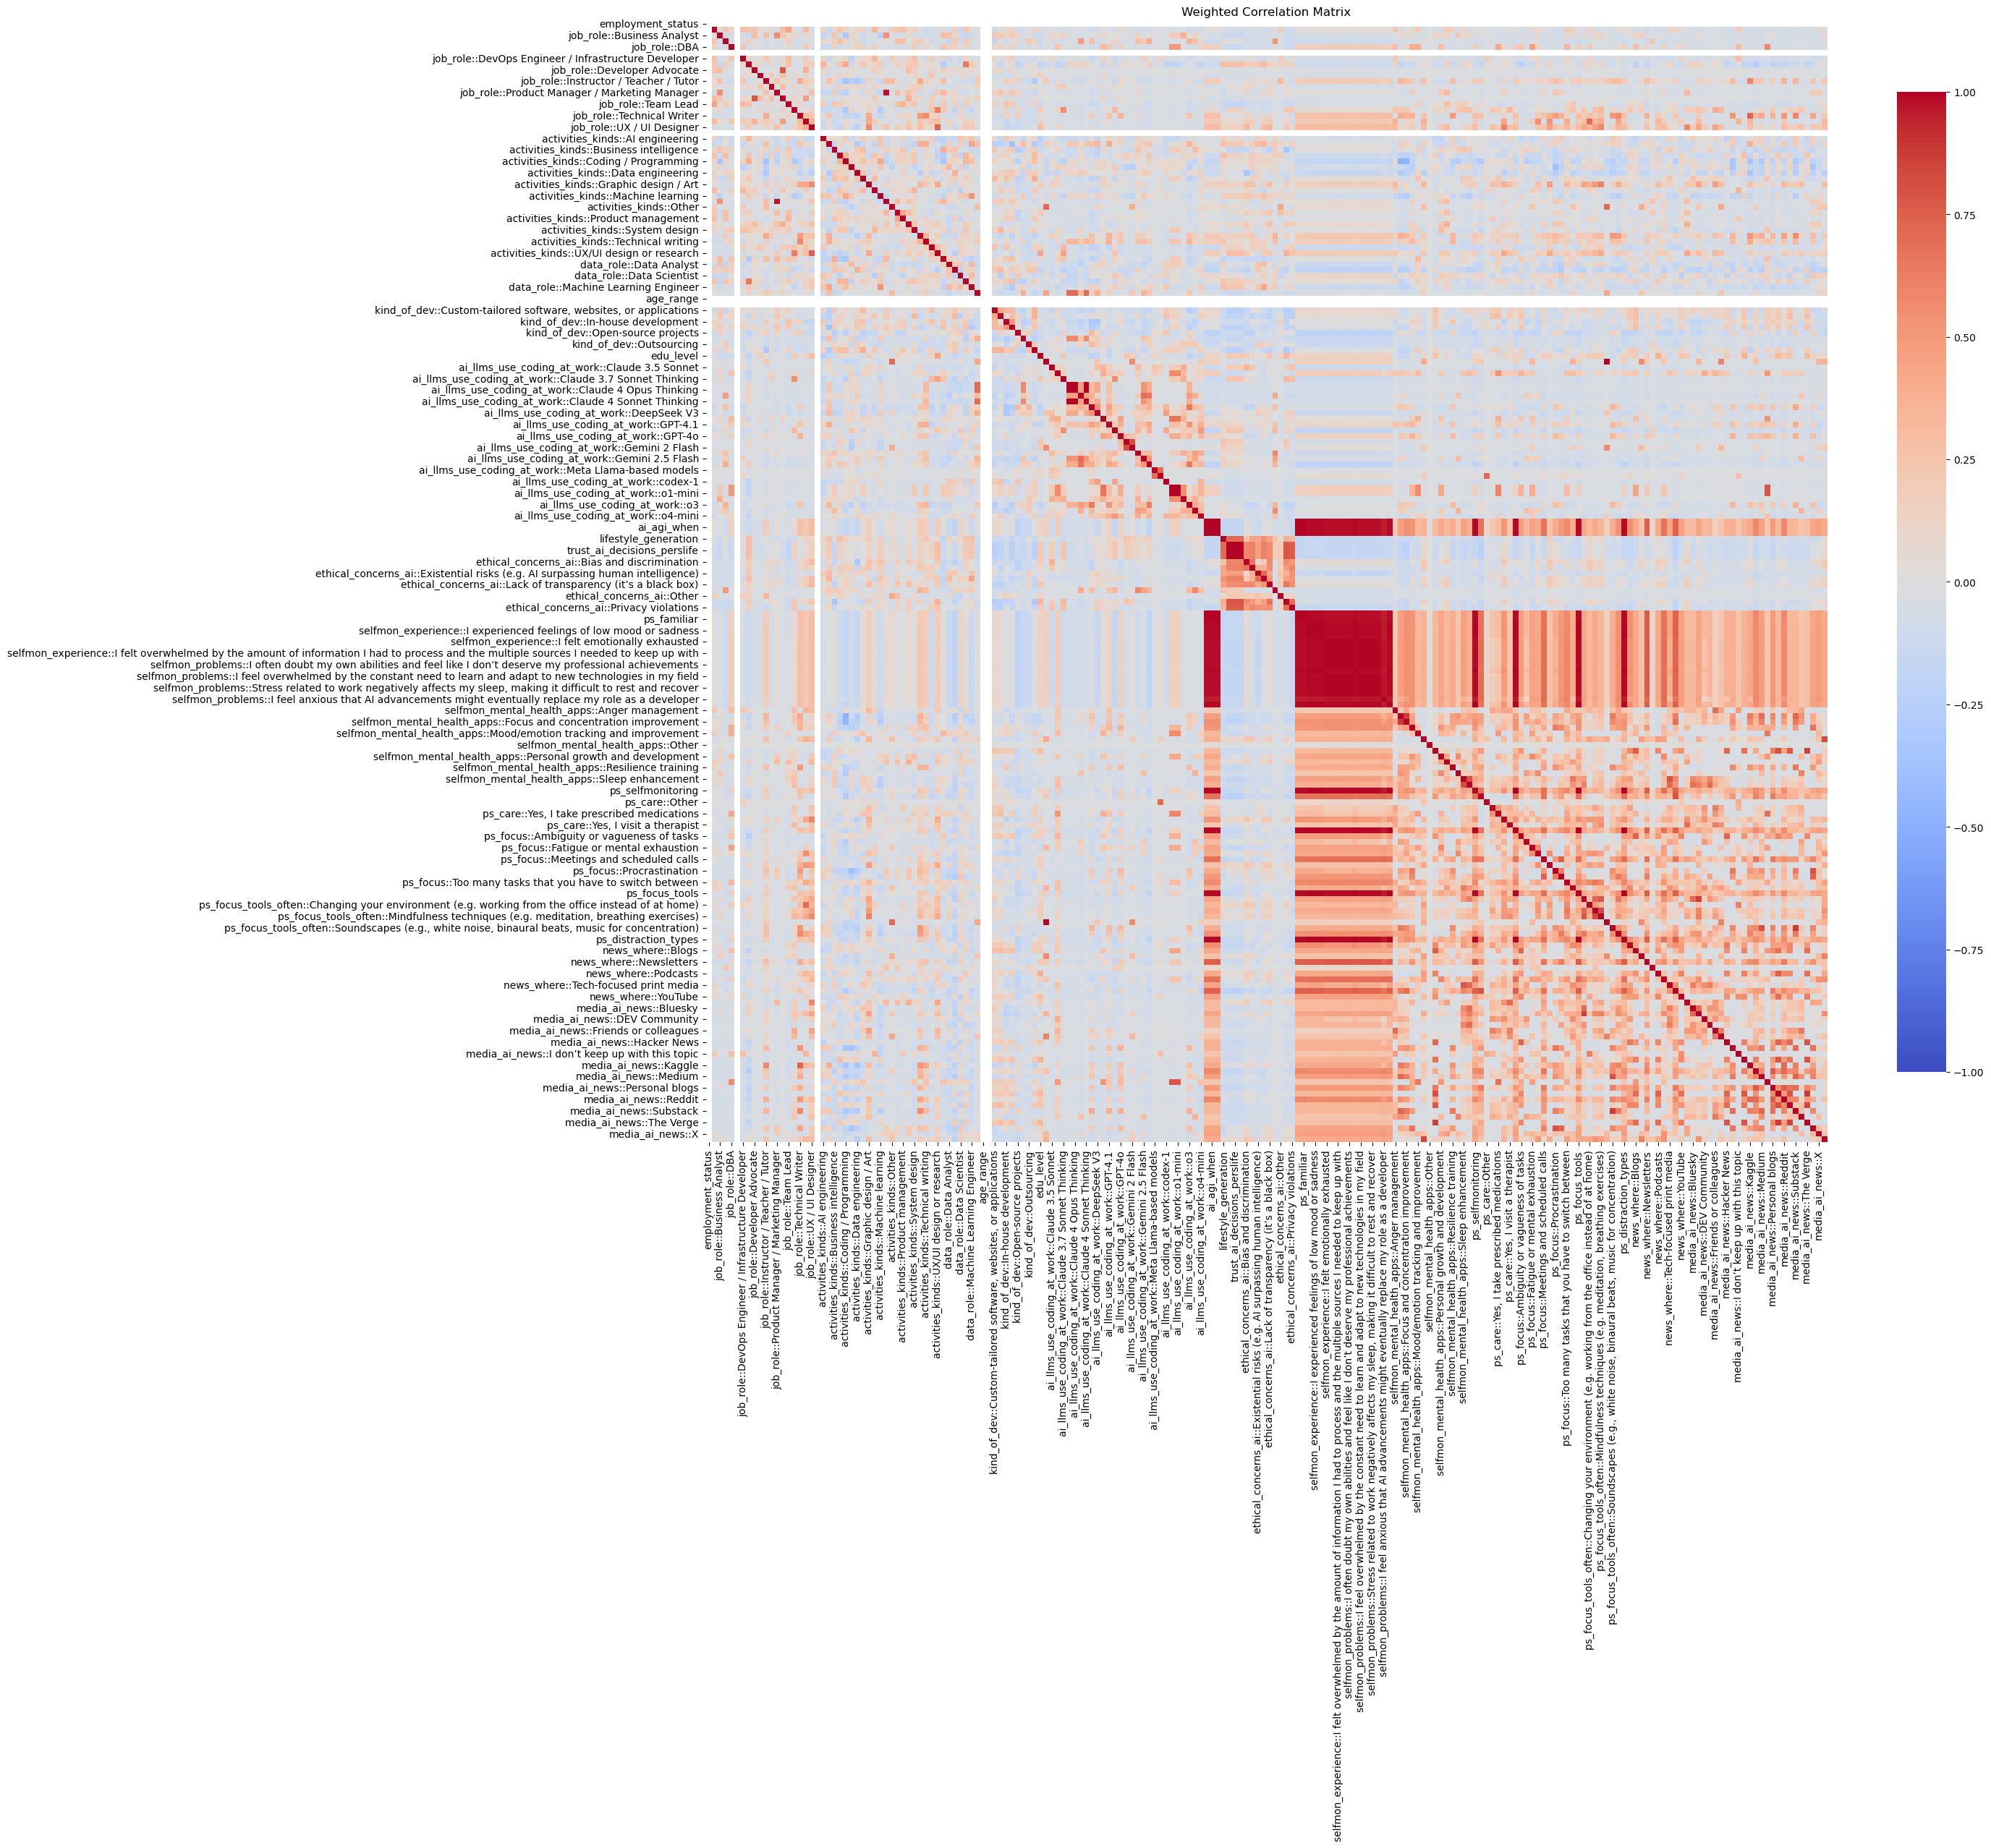

In [78]:
plt.figure(figsize=(25, 22))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={'shrink': 0.8})
plt.title("Weighted Correlation Matrix")
plt.show()

### 3. Saving selected data for further analysis

In [79]:
survey_data.to_csv('data/jetbrains_ai_health.csv')